<a href="https://colab.research.google.com/github/DamarAlif/Tubes-VisiKomputer/blob/main/VisKomputerTubes_1301200290.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sshikamaru/car-object-detection

 95% 106M/112M [00:00<00:00, 156MB/s] 
100% 112M/112M [00:00<00:00, 151MB/s]


In [ ]:
! unzip car-object-detection.zip

Archive:  car-object-detection.zip
  inflating: data/sample_submission.csv  
  inflating: data/testing_images/vid_5_25100.jpg  
  inflating: data/testing_images/vid_5_25120.jpg  
  inflating: data/testing_images/vid_5_25140.jpg  
  inflating: data/testing_images/vid_5_25160.jpg  
  inflating: data/testing_images/vid_5_25180.jpg  
  inflating: data/testing_images/vid_5_25200.jpg  
  inflating: data/testing_images/vid_5_25220.jpg  
  inflating: data/testing_images/vid_5_25240.jpg  
  inflating: data/testing_images/vid_5_25260.jpg  
  inflating: data/testing_images/vid_5_26320.jpg  
  inflating: data/testing_images/vid_5_26400.jpg  
  inflating: data/testing_images/vid_5_26420.jpg  
  inflating: data/testing_images/vid_5_26560.jpg  
  inflating: data/testing_images/vid_5_26580.jpg  
  inflating: data/testing_images/vid_5_26600.jpg  
  inflating: data/testing_images/vid_5_26620.jpg  
  inflating: data/testing_images/vid_5_26640.jpg  
  inflating: data/testing_images/vid_5_26660.jpg  
  inf

In [ ]:
df = pd.read_csv("/content/data/train_solution_bounding_boxes (1).csv")

In [ ]:
df.head()

image        xmin        ymin        xmax        ymax
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422

In [ ]:
df["image"][4]

'vid_4_10060.jpg'

(281.2590449, 187.0350708, 46.46888560000002, 36.190476200000006)


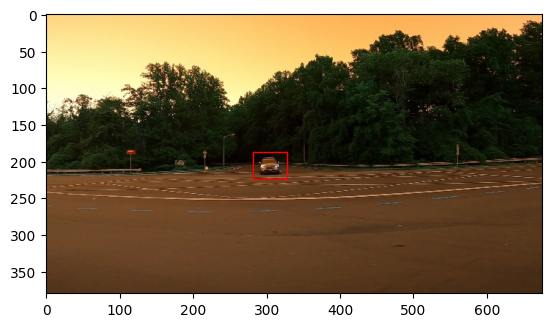

(15.16353111, 187.0350708, 105.16642549000001, 49.395109399999996)


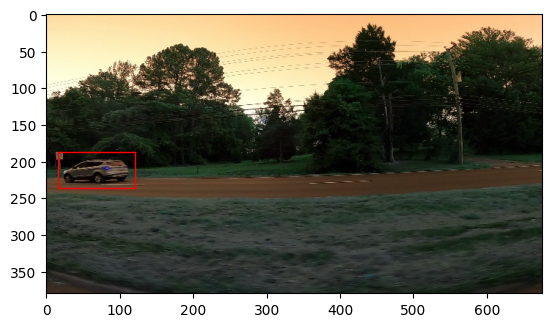

(239.1924747, 176.7648005, 122.77568739999998, 59.66537969999999)


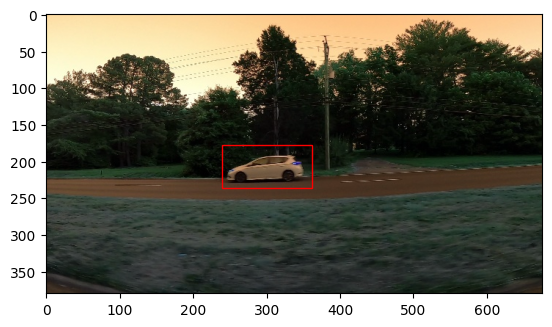

(496.4833575, 172.3632561, 133.53690299999994, 59.176319199999995)


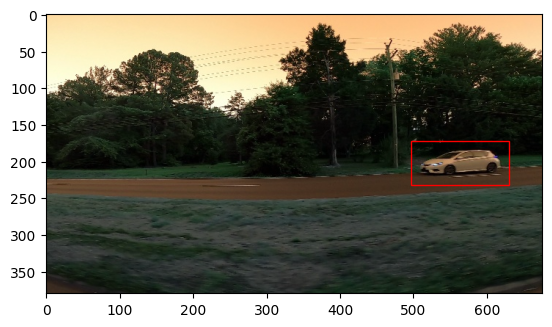

(16.63096961, 186.5460103, 115.92764109000001, 51.8404118)


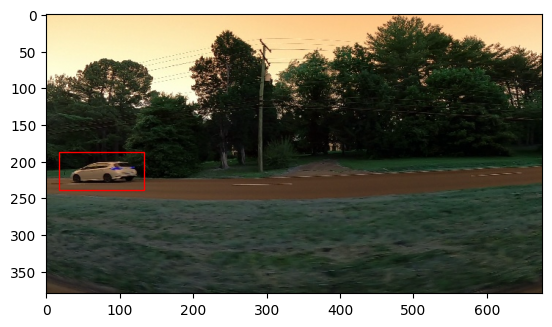

(447.568741, 160.6258044, 134.51519530000002, 71.89189190000002)


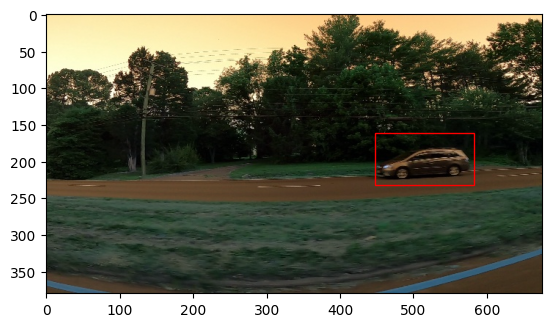

(168.7554269, 180.6772844, 135.98263390000002, 66.0231661)


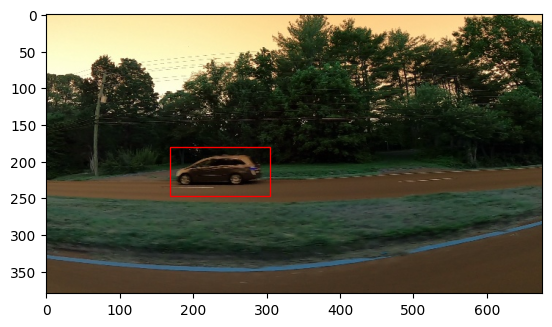

In [ ]:
for i in range(7):
    img_path = "/content/data/training_images/" + df["image"][i]
    img = cv2.imread(img_path)
    xmin = df["xmin"][i]
    ymin = df["ymin"][i]
    xmax = df["xmax"][i]
    ymax = df["ymax"][i]

    x = xmin
    y = ymin

    w = xmax - xmin
    h = ymax - ymin


    print(f"{x,y,w,h}")
    fig, ax = plt.subplots()
    ax.imshow(img)
    rect = patches.Rectangle((x,y),w,h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

In [ ]:
processed_img = []
bounding_box = []

In [ ]:
img_folder = "/content/data/training_images"

In [ ]:
for index, row in df.iterrows():
    image_path = os.path.join(img_folder,row['image'])
    xmin, xmax, ymin, ymax = row['xmin'], row['xmax'], row['ymin'], row['ymax']

    image = cv2.imread(image_path)

    # Preprocess the image (resize and normalize)
    #image = cv2.resize(image, (150, 150))  # Replace input_width and input_height with desired dimensions
    #image = image / 255.0  # Normalize pixel values to the range [0, 1]

    # Append the preprocessed image and bounding box coordinates
    processed_img.append(image)
    bounding_box.append([xmin, xmax, ymin, ymax])

(281.2590449, 187.0350708, 46.46888560000002, 36.190476200000006)


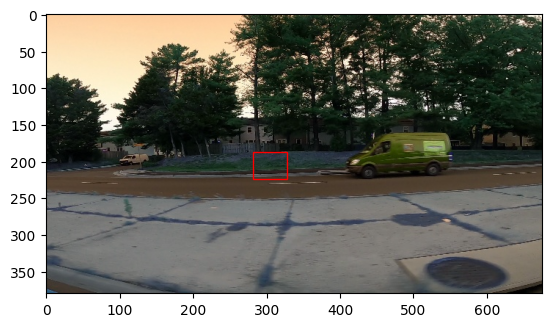

(15.16353111, 187.0350708, 105.16642549000001, 49.395109399999996)


(239.1924747, 176.7648005, 122.77568739999998, 59.66537969999999)


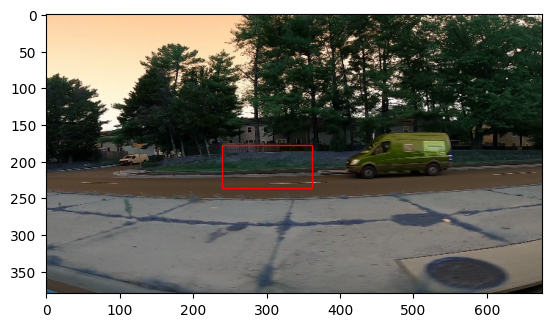

(496.4833575, 172.3632561, 133.53690299999994, 59.176319199999995)


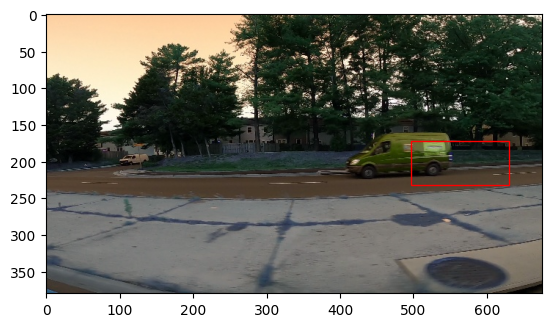

(16.63096961, 186.5460103, 115.92764109000001, 51.8404118)


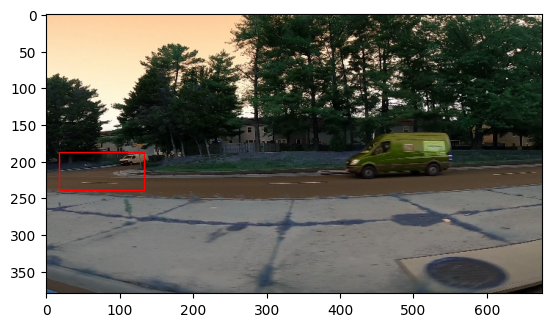

In [ ]:
for i in range(5):
    xmin = bounding_box[i][0]
    xmax = bounding_box[i][1]
    ymin = bounding_box[i][2]
    ymax = bounding_box[i][3]

    x = xmin
    y = ymin

    w = xmax - xmin
    h = ymax - ymin

    print(f"{x,y,w,h}")
    fig, ax = plt.subplots()
    ax.imshow(img)
    rect = patches.Rectangle((x,y),w,h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

In [ ]:
print(type(processed_img))
print(type(processed_img[0]))

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
print(type(bounding_box))
print(type(bounding_box[0]))

<class 'list'>
<class 'list'>


In [ ]:
processed_img = np.array(processed_img)
bounding_box = np.array(bounding_box)

In [ ]:
print(type(processed_img))
print(type(processed_img[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(type(bounding_box))
print(type(bounding_box[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(processed_img,bounding_box,test_size = 0.2,random_state = 42)

(98.31837916, 188.5022523, 42.555716340000004, 17.1171171)


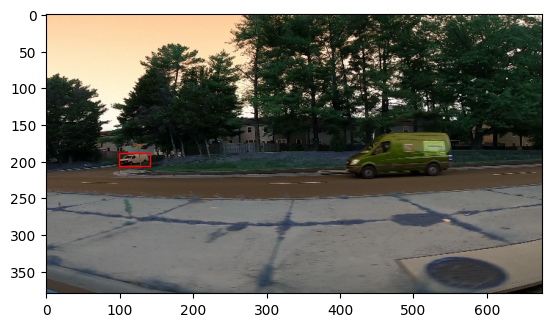

In [ ]:
img = x_train[1]
xmin = y_train[1][0]
xmax = y_train[1][1]
ymin = y_train[1][2]
ymax = y_train[1][3]

x = xmin
y = ymin

w = xmax - xmin
h = ymax - ymin

print(f"{x,y,w,h}")
fig, ax = plt.subplots()
ax.imshow(img)
rect = patches.Rectangle((x,y),w,h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()
